In [34]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.optimize import fsolve
import math
from sympy import Symbol, nsolve
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from numpy.random import rand

In [40]:

start=time.time()
print()

#par=(N,tf,t_inte,eps,alpha1,alpha2,alpha3,alpha4,beta,eta,gamma,de,d)
par=[2,200,10000,0.01,3.1,5,1,4,2,2,2,1,0.008]
def run_function(par):
    N=par[0] #number of oscillators

    tf=par[1] #final time
    t_inte=par[2] #total number of time steps

    #epsilon parameter
    eps=par[3]

    #other parameters
    alpha1=par[4]
    alpha2=par[5]
    alpha3=par[6]
    alpha4=par[7]
    beta=par[8]
    eta=par[9]
    gamma=par[10]
    de=par[11]
    d=par[12]


    # Define derivative function
    def f_der(t, z, alpha1,alpha2,alpha3,alpha4,beta,eta,gamma,de,d,eps):
        dzdt=np.zeros(3*N+1)
        for i in range (N):
            dzdt[i] = alpha1/(1+z[i+N]**beta)-z[i]+alpha3*z[i+2*N]**eta/(1+z[i+2*N]**eta)

            dzdt[i+N] = alpha2/(1+z[i]**gamma)-z[i+N]

            dzdt[i+2*N]=eps*(alpha4/(1+z[i]**gamma)-z[i+2*N])+2*d*(z[3*N]-z[i+2*N])

            sum_coupling=0
            for j in range (N):
                sum_coupling+=(-z[3*N]+z[i+2*N])

            dzdt[3*N] = de*sum_coupling/N
        return dzdt


    # Define time spans and initial values

    tspan = np.linspace(0, tf, t_inte)

    zinit=np.zeros(3*N+1)
    epsilon=1
    for i in range (N):
        zinit[i] = epsilon*np.random.uniform(0, 1)
        zinit[i+N] = epsilon*np.random.uniform(0, 1)
        zinit[i+2*N] = epsilon*np.random.uniform(0, 1)
        zinit[3*N] = epsilon*np.random.uniform(0, 1)

    zinit=[0.6787958,  0.87009246, 0.25548844, 0.63005963, 0.07110232, 0.57949967, 0.26254823]


    # Solve equations numerically
    sol = solve_ivp(lambda t, z: f_der(t, z, alpha1,alpha2,alpha3,alpha4,beta,eta,gamma,de,d,eps)
                    , [tspan[0], tspan[-1]], zinit, t_eval=tspan, rtol = 1e-5)
    return sol
par=[2,200,10000,0.01,3.1,5,1,4,2,2,2,1,0.008]
solucao=run_function(par)

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)



O tempo usado na solução foi: 
0.021117210388183594


In [29]:
#Data is stored in sol.y[i], time steps are stored in sol.t



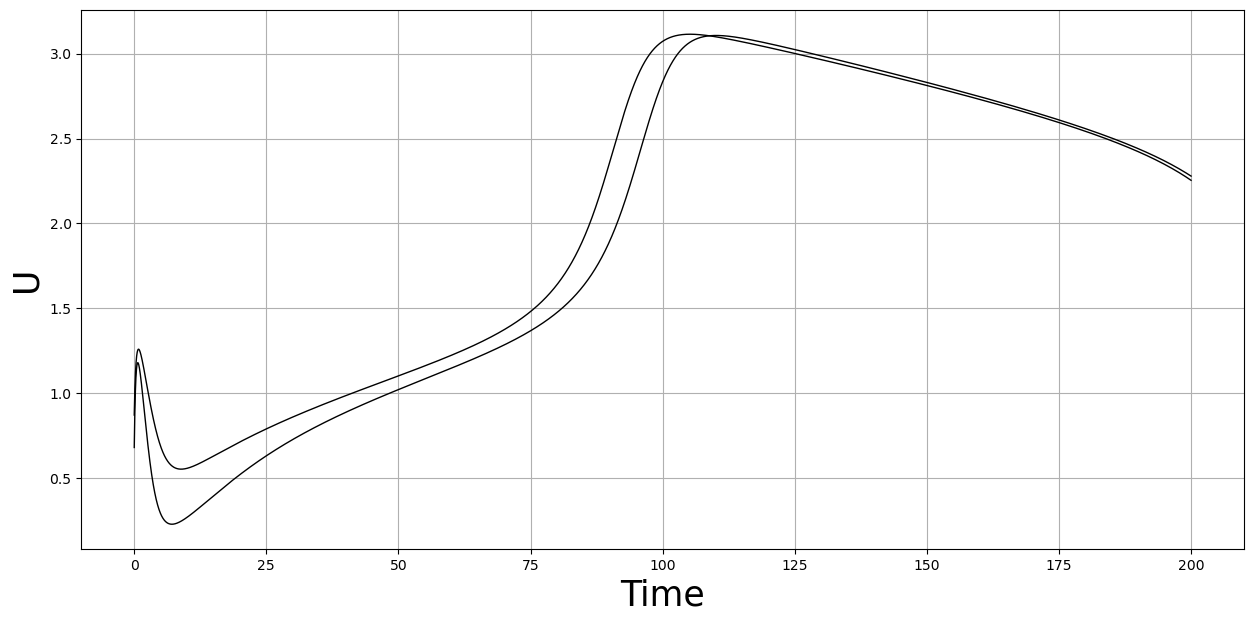


O tempo usado na solução foi: 
0.07685017585754395


In [41]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('white')

for n in range(0,N):
    plt.xlabel('Time',color='black',fontsize=25)
    plt.ylabel('U',color='black',fontsize=25)
    plt.plot(solucao.t, solucao.y[n], color='black', linewidth=1, label=r'P1(t)')

plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

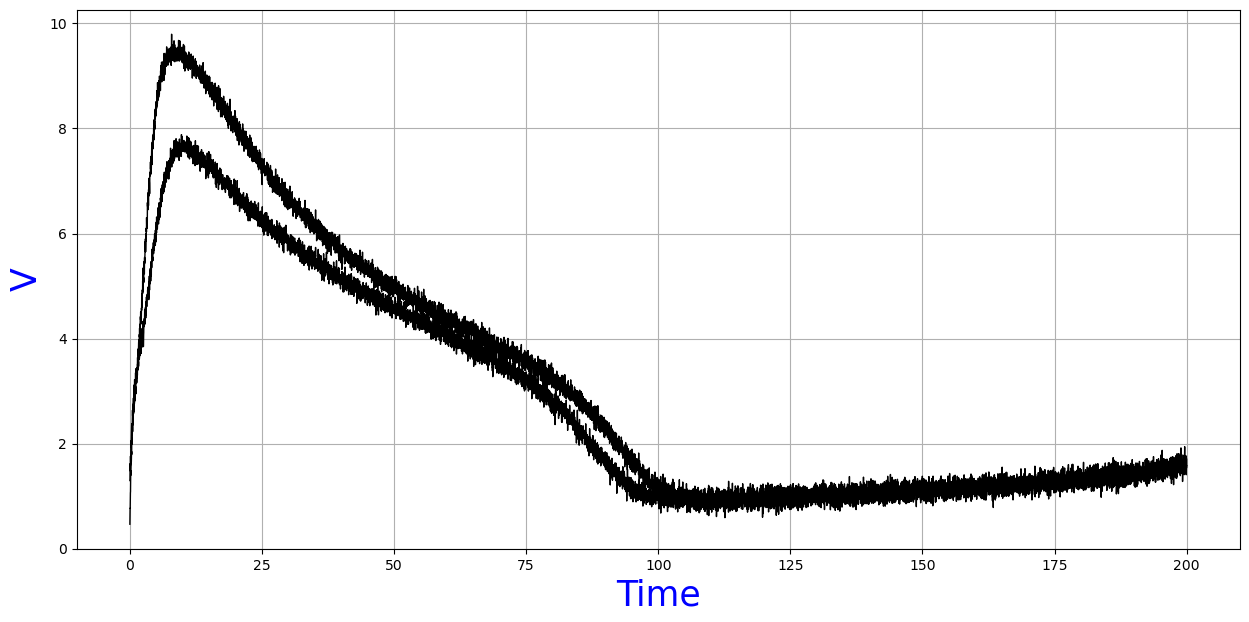


O tempo usado na solução foi: 
0.14535260200500488


In [31]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))

for n in range(N,2*N):
    plt.xlabel('Time',color='blue',fontsize=25)
    plt.ylabel('V',color='blue',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')

plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

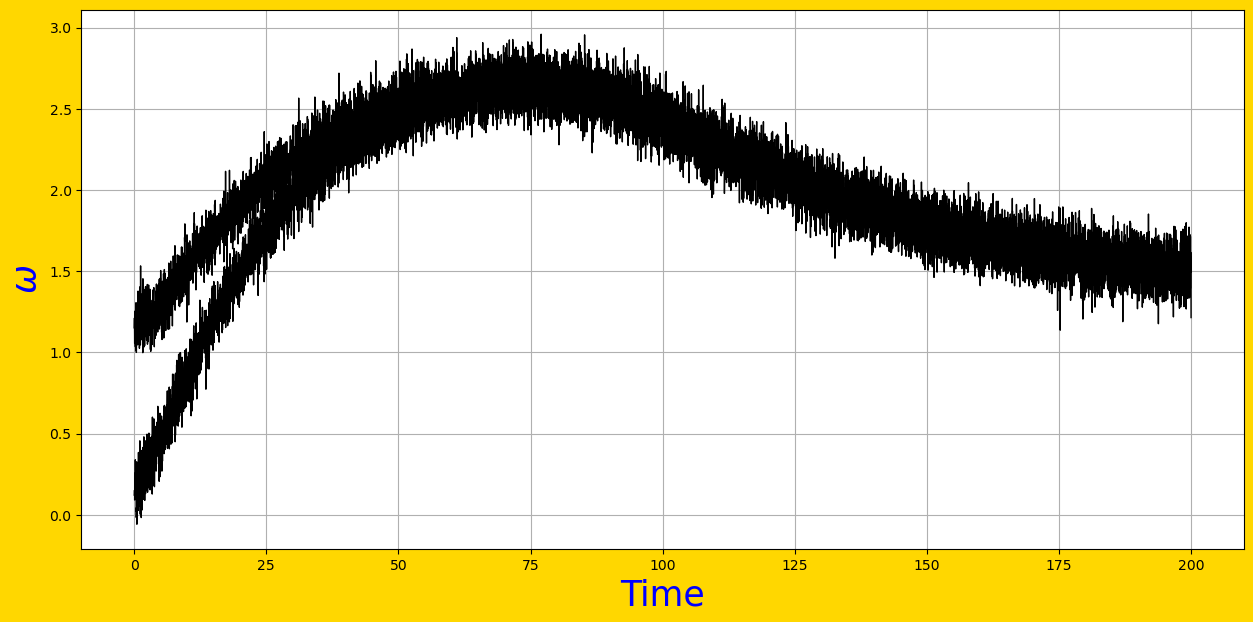


O tempo usado na solução foi: 
0.11676764488220215


In [32]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))
fig.patch.set_facecolor('gold')

for n in range(2*N,3*N):
    plt.xlabel('Time',color='blue',fontsize=25)
    plt.ylabel('$\omega$',color='blue',fontsize=25)
    plt.plot(sol.t, sol.y[n], color='black', linewidth=1, label=r'P1(t)')

plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)

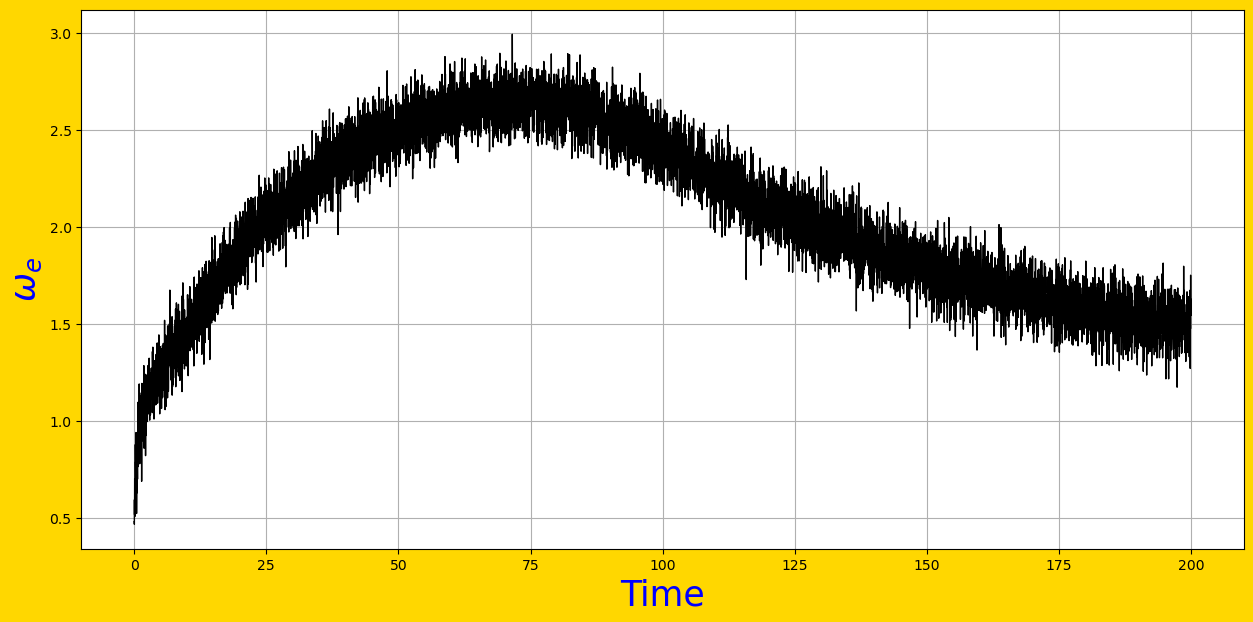


O tempo usado na solução foi: 
0.10273003578186035


In [33]:
start=time.time()
print()

fig,ax=plt.subplots(figsize=(15,7))


plt.xlabel('Time',color='blue',fontsize=25)
plt.ylabel('$\omega_{e}$',color='blue',fontsize=25)
plt.plot(sol.t, sol.y[3*N], color='black', linewidth=1, label=r'P1(t)')

plt.grid()
plt.show()

end=time.time()
print()
print("O tempo usado na solução foi: ")
print(end-start)